In [33]:
import pandas as pd



In [14]:
df.set_index(df['Date'],inplace=True)
a=df['Date'][df['Company ']=='GHI']
b=df['Price'][df['Company ']=='GHI']
c=xtest['Date'][xtest['Company ']=='GHI']
d=xtest['Price'][xtest['Company ']=='GHI']
b.shape

(3999,)

In [2]:
df=pd.read_csv(r'C:\Users\Abhinandu Reddy\Desktop\wpi cpi\dataset\train.csv')

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt



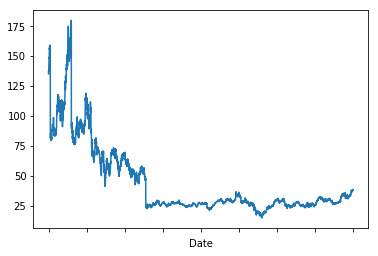

In [16]:
b.plot()


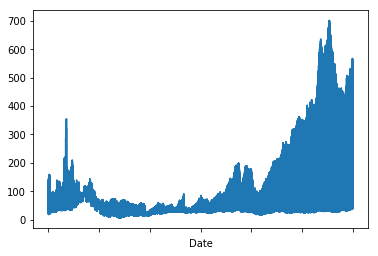

In [17]:
df['Price'][10:].plot()

In [220]:

df.drop(['ID'],inplace=True,axis=1)
df.drop([730],inplace=True,axis=0)
y=df['Price']
df['Price'].unique()

array([ 18.81,  57.5 , 135.25, ..., 384.49, 560.02, 386.95])

In [8]:
df["Date"].unique().shape

(3996,)

In [222]:
df.dropna(inplace=True)

In [223]:
df['Company '].unique()

array(['ABC', 'DEF', 'GHI'], dtype=object)

In [224]:
def oneHotEncode(df,colNames):
    for col in colNames:
        if( df[col].dtype == np.dtype('object')):
            dummies = pd.get_dummies(df[col],prefix=col)
            df = pd.concat([df,dummies],axis=1)

            #drop the encoded column
            df.drop([col],axis = 1 , inplace=True)
    return df

In [225]:
import numpy as np
df.columns.shape

(68,)

In [226]:
df=oneHotEncode(df,df.columns)

In [227]:
import keras

In [228]:
df.columns

Index(['SMA', 'EMA', 'WMA', 'DEMA', 'TEMA', 'TRIMA', 'KAMA', 'FAMA', 'MAMA',
       'T3',
       ...
       'Date_31-12-2153', 'Date_31-12-2154', 'Date_31-12-2157',
       'Date_31-12-2158', 'Date_31-12-2159', 'Date_31-12-2160',
       'Date_31-12-2162', 'Company _ABC', 'Company _DEF', 'Company _GHI'],
      dtype='object', length=4011)

In [18]:
y=df["Price"]

In [19]:
df.drop(['Date','Company '],inplace=True,axis=1)

In [20]:
x=df

In [21]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(df,y,test_size=0.01,random_state=40)
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

(11877, 67) (120, 67) (11877,) (120,)


In [260]:
ytrain[0:0]

Series([], Name: Price, dtype: float64)

In [178]:
X_train = []
y_train = []
for i in range(60, 2035):
    X_train.append(xtrain[i-60:i,:])
    y_train.append(ytrain[i: 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
x=xtrain
y=ytrain

In [88]:
x.head()

,SMA,EMA,WMA,DEMA,TEMA,TRIMA,KAMA,FAMA,MAMA,T3,...,OBV,HT_TRENDLINE,LEAD SINE,SINE,TRENDMODE,DCPERIOD,HT_DCPHASE,PHASE,QUADRATURE,Price
2116,29.9580,31.3279,31.8095,32.3241,34.0370,30.7873,29.2558,80.4454,49.9471,27.6749,...,119526533.0,33.6829,0.9545,0.4640,1.0,32.8424,27.6439,8.8685,5.7972,37.38
9298,133.1372,133.0322,131.1684,129.4095,128.0986,131.9787,133.2484,87.0098,118.4611,135.8725,...,755972486.0,138.7497,-0.4490,-0.9493,1.0,27.5012,288.3204,-11.2716,-6.0732,131.47
3346,17.5000,17.5885,17.5758,17.3927,17.3381,17.7067,17.3424,26.0581,15.0983,17.5389,...,171046733.0,18.2680,0.6453,-0.0839,1.0,30.8222,-4.8144,0.7742,3.4864,15.85
1322,92.4430,92.5332,92.7122,93.0821,92.2654,92.9993,92.7260,87.0109,98.2831,92.3232,...,440111700.0,93.0296,0.8893,0.9522,0.0,19.8371,72.2103,2.5192,0.2645,88.06
4922,28.3297,28.4296,28.5209,28.5788,28.7002,28.4337,28.3447,35.4790,27.5104,28.2558,...,985405450.0,28.1261,0.9977,0.6573,1.0,27.1678,41.0980,0.2895,1.6131,28.58


In [89]:
x.columns[x.isnull().any()]


Index([], dtype='object')

In [90]:
miss = x.isnull().sum()/len(x)
miss = miss[miss > 0]
miss.sort_values(inplace=True)
miss


Series([], dtype: float64)

In [91]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
import seaborn as sns
from scipy import stats
from scipy.stats import norm

C:\Users\Abhinandu Reddy\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


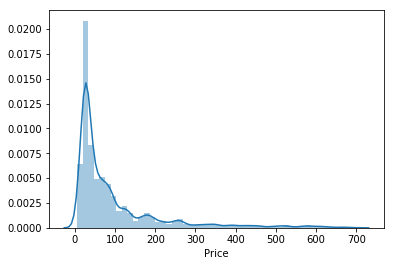

In [43]:
sns.distplot(y)

Skewness is 0.5662594294799641


C:\Users\Abhinandu Reddy\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


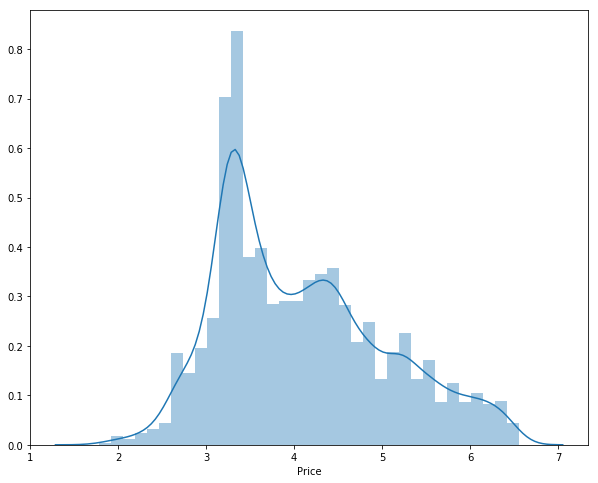

In [92]:
target = np.log(y)
print ('Skewness is', target.skew())
sns.distplot(target)

In [93]:
numeric_data = x.select_dtypes(include=[np.number])
cat_data = x.select_dtypes(exclude=[np.number])
print ("There are {} numeric and {} categorical columns in train data".format(numeric_data.shape[1],cat_data.shape[1]))


There are 66 numeric and 0 categorical columns in train data


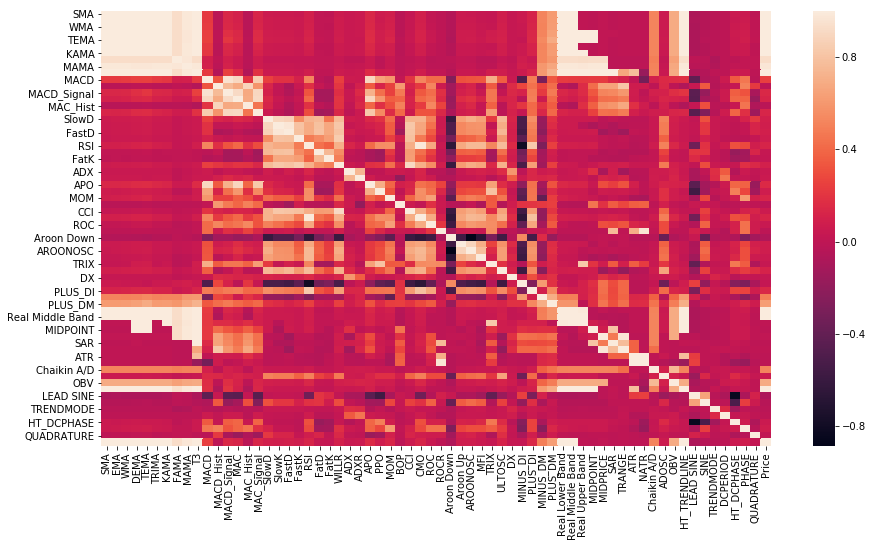

In [14]:

corr = numeric_data.corr()
plt.figure(figsize=(15,8))

sns.heatmap(corr)


In [45]:
numeric_data.head()

,ID,SMA,EMA,WMA,DEMA,TEMA,TRIMA,KAMA,FAMA,MAMA,...,OBV,HT_TRENDLINE,LEAD SINE,SINE,TRENDMODE,DCPERIOD,HT_DCPHASE,PHASE,QUADRATURE,Price
4812,4813,27.7690,27.8897,28.0538,28.3526,28.5236,27.8867,27.1897,20.8606,23.9053,...,2.603571e+08,27.0405,-0.5818,0.1637,1.0,23.8331,170.5787,1.1176,1.1038,28.78
1286,1287,94.0360,93.2844,93.4502,93.6913,91.7724,94.6067,92.7463,86.2930,99.0584,...,4.695527e+08,93.8329,-0.9956,-0.6378,1.0,20.7632,219.6263,2.0854,-1.2275,89.50
9405,9406,265.8041,260.9481,261.4137,258.2692,253.8511,266.6801,261.3081,163.5719,221.1079,...,2.401380e+09,265.9827,-0.4521,-0.9504,1.0,13.7582,288.1191,-3.3479,-6.5702,248.63
537,538,37.6510,37.8727,38.0609,38.1550,38.2630,37.9537,38.0559,9.6287,26.8996,...,1.899106e+08,37.4786,0.2653,0.8693,1.0,17.3380,119.6172,1.3813,1.3169,35.06
8607,8608,140.9170,139.4404,141.3345,142.5459,141.7937,142.0203,141.5201,125.9155,118.6088,...,1.781222e+09,133.3447,-0.8314,-0.1949,1.0,20.2494,191.2390,5.7687,-0.3290,136.09


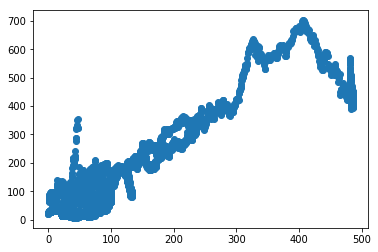

In [47]:
plt.scatter(df['FAMA'],df['Price'])


In [18]:
cat_data.describe()


,Date,Company
count,8397,8397
unique,3906,3
top,28-02-2150,GHI
freq,4,2809


In [19]:
sp_pivot = df.pivot_table(index='Company ', values='Price', aggfunc=np.median)
sp_pivot

,Price
Company,
ABC,76.089
DEF,66.990
GHI,29.040


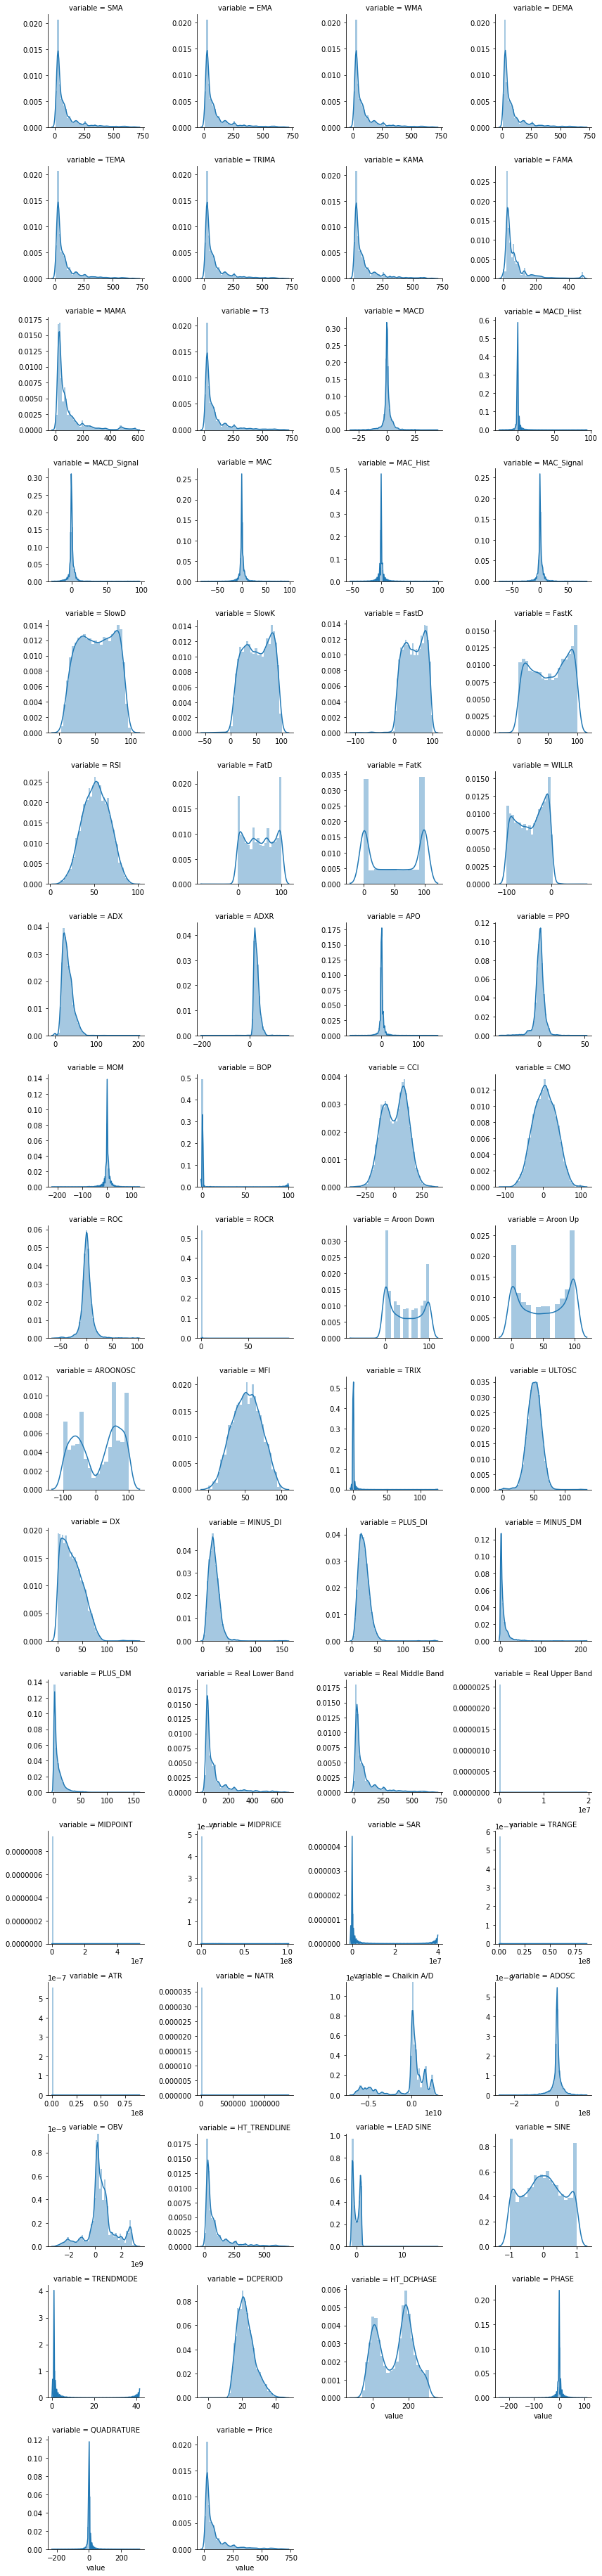

In [20]:
num = [f for f in df.columns if df.dtypes[f] != 'object']

nd = pd.melt(x, value_vars = num)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1

In [21]:
a=df['SMA']>200
b=df['Price']<200
df[a & b]


,Date,Company,SMA,EMA,WMA,DEMA,TEMA,TRIMA,KAMA,FAMA,...,OBV,HT_TRENDLINE,LEAD SINE,SINE,TRENDMODE,DCPERIOD,HT_DCPHASE,PHASE,QUADRATURE,Price
670,03-12-2148,DEF,200.5800,193.5439,204.5509,212.4250,210.7588,206.8833,201.2328,41.1265,...,7.889085e+07,147.7348,-0.3613,0.4038,1.0,30.3300,156.1815,64.2504,-67.9089,188.500
673,04-12-2148,DEF,203.0300,193.8996,203.6273,209.6387,205.7048,207.8567,201.0521,41.4290,...,7.518125e+07,151.2691,-0.4439,0.3197,1.0,29.4038,161.3557,38.6522,-85.6212,191.000
733,05-01-2149,DEF,304.8800,275.9840,289.0036,269.6263,237.6668,322.7967,298.0699,48.5825,...,1.023038e+08,261.1738,-0.8517,-0.2318,1.0,22.2897,193.4003,21.2545,-34.5618,138.000
736,06-01-2149,DEF,288.1800,250.6233,258.3891,224.6718,182.4919,309.8600,277.7869,48.9992,...,1.203921e+08,258.5839,-0.9461,-0.4401,1.0,23.1201,206.1097,21.9462,-31.2484,158.900
739,07-01-2149,DEF,269.2000,229.9827,230.9200,191.8619,147.3944,288.8433,253.3184,49.4141,...,1.440294e+08,254.4366,-0.9961,-0.6418,1.0,23.5378,219.9225,13.7964,-114.6682,160.300
742,08-01-2149,DEF,254.9000,221.8040,215.6109,183.9226,147.7360,263.2133,247.3078,49.8296,...,1.773605e+08,251.2203,-0.9775,-0.8403,1.0,23.5692,237.1671,-26.9038,-137.4647,184.600
745,11-01-2149,DEF,241.0700,214.9306,202.7200,178.3130,149.7397,233.1500,241.9150,50.2457,...,1.968220e+08,249.3397,-0.8845,-0.9553,1.0,23.9909,252.8130,-43.6290,-228.9711,163.400
748,12-01-2149,DEF,226.0200,208.6705,191.7073,173.5887,151.4672,205.2867,235.8024,50.6619,...,1.846004e+08,247.5038,-0.7984,-0.9903,1.0,24.7760,262.0193,-169.3029,-290.1384,148.000
751,13-01-2149,DEF,203.9200,194.1849,174.0673,153.6299,131.0523,184.5700,218.4900,51.0759,...,1.696622e+08,244.7396,-0.7025,-1.0000,1.0,25.9635,270.3720,-237.5702,32.0570,138.000
8943,19-11-2159,ABC,202.3750,202.6438,204.2285,205.9882,206.8138,203.1863,202.7350,131.0418,...,2.216236e+09,198.3936,-0.3701,0.3952,1.0,16.9340,156.7223,7.8670,-5.8062,199.920


In [201]:
from sklearn.linear_model import LinearRegression

In [202]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [22]:
x=x.fillna(0)
xtest=xtest.fillna(0)
y=y.fillna(0)
ytest=ytest.fillna(0)


In [23]:
from sklearn.linear_model import Ridge,Lasso


In [24]:
reg = Ridge().fit(x[['TEMA','DEMA','WMA','EMA','SMA','TRIMA','KAMA','T3','Real Lower Band','Real Middle Band','HT_TRENDLINE','MAMA']], y)

In [25]:
yp=reg.predict(xtest[['TEMA','DEMA','WMA','EMA','SMA','TRIMA','KAMA','T3','Real Lower Band','Real Middle Band','HT_TRENDLINE','MAMA']])

In [26]:
from sklearn.metrics import r2_score
r2_score((ytest), yp)


0.996442594028551

In [52]:
print (corr['Price'].sort_values(ascending=False)[:20], '\n') #top 15 values
print ('----------------------')
print (corr['Price'].sort_values(ascending=False)[-10:]) #last 5 values`
0.99815341394789
0.998430569443508

Price               1.000000
TEMA                0.998963
DEMA                0.998718
WMA                 0.998331
EMA                 0.998121
SMA                 0.997634
TRIMA               0.997407
KAMA                0.997370
T3                  0.996937
Real Lower Band     0.996250
Real Middle Band    0.996031
HT_TRENDLINE        0.994697
MAMA                0.976812
FAMA                0.927866
OBV                 0.687668
PLUS_DM             0.627276
Chaikin A/D         0.516136
MINUS_DM            0.492808
MACD                0.246037
APO                 0.150610
Name: Price, dtype: float64 

----------------------
MIDPOINT     -0.001821
ATR          -0.003993
DCPERIOD     -0.004241
MACD_Hist    -0.007192
BOP          -0.014234
MAC_Hist     -0.015896
TRENDMODE    -0.019399
SINE         -0.030641
Aroon Down   -0.064204
LEAD SINE    -0.075112
Name: Price, dtype: float64


In [208]:
sam=pd.read_csv(r'C:\Users\Abhinandu Reddy\Desktop\wpi cpi\dataset\Sample_Submission.csv')

In [209]:
sam.head()

,ID,Price
0,12001,0
1,12002,0
2,12003,0
3,12004,0
4,12005,0


In [210]:
test=pd.read_csv(r'C:\Users\Abhinandu Reddy\Desktop\wpi cpi\dataset\test.csv')

In [211]:
test.head()

,ID,Date,Company,SMA,EMA,WMA,DEMA,TEMA,TRIMA,KAMA,...,ADOSC,OBV,HT_TRENDLINE,LEAD SINE,SINE,TRENDMODE,DCPERIOD,HT_DCPHASE,PHASE,QUADRATURE
0,12001,09-12-2163,ABC,551.207,553.3926,559.2131,567.0388,570.5996,554.3346,560.7553,...,-2.038989e+06,2594606100,531.2224,-0.0518,0.6695,1,25.7849,137.9718,34.4973,10.5310
1,12002,09-12-2163,DEF,385.975,384.0682,387.7373,391.4103,390.3597,388.0083,381.3179,...,8.652003e+05,961165686,371.0374,-0.8132,-0.1634,1,21.2438,189.4060,17.5922,-7.5945
2,12003,09-12-2163,GHI,38.116,38.1516,38.2909,38.5057,38.6109,38.1000,37.8252,...,2.035506e+07,-2042164174,37.6903,-0.1467,0.5958,1,19.6563,143.4333,0.3742,0.3351
3,12004,10-12-2163,ABC,555.463,555.2449,561.4627,567.9254,570.0487,558.9843,561.3335,...,-1.370708e+06,2584667900,532.6439,-0.1763,0.5714,1,26.4483,145.1522,32.5341,-12.1039
4,12005,10-12-2163,DEF,386.967,384.0086,387.3309,389.9669,387.9751,388.2523,381.3996,...,1.188655e+06,963902486,372.0115,-0.8503,-0.2290,1,21.5579,193.2403,12.3675,-26.7711


In [212]:
ypt=reg.predict(test[['TEMA','DEMA','WMA','EMA','SMA','TRIMA','KAMA','T3','Real Lower Band','Real Middle Band','HT_TRENDLINE','MAMA']])

In [213]:
sam.shape

(4161, 2)

In [214]:
test.shape

(4161, 68)

In [215]:
if sam['ID'].all()==test['ID'].all():
    print('s')

s


In [216]:
sam['Price']=ypt

In [217]:
sam.to_csv('samplle')

In [ ]:
ysvrp=clf.predict(xtest[['TEMA','DEMA','WMA','EMA','SMA','TRIMA','KAMA','T3','Real Lower Band','Real Middle Band','HT_TRENDLINE']])

In [ ]:
r2_score(ytest, ysvrp)

In [ ]:
import tensorflow as tf
model=tf.keras.models.Sequential([tf.keras.layers.Dense(10,activation=tf.nn.relu),tf.keras.layers.Dense(10,activation=tf.nn.relu),tf.keras.layers.Dense(1)])
model.compile(optimizer=tf.train.GradientDescentOptimizer(0.001),loss='mean_squared_error',metrics=['accuracy'])
model.fit(x[['TEMA','DEMA','WMA','EMA','SMA','TRIMA','KAMA','T3','Real Lower Band','Real Middle Band','HT_TRENDLINE']],ytrain,epochs=20)
model.evaluate(xtest[['TEMA','DEMA','WMA','EMA','SMA','TRIMA','KAMA','T3','Real Lower Band','Real Middle Band','HT_TRENDLINE']],ytest)

In [83]:
test[['TEMA','DEMA','WMA','EMA','SMA','TRIMA','KAMA','T3','Real Lower Band','Real Middle Band','HT_TRENDLINE']][0:2].values

array([[570.5996, 567.0388, 559.2131, 553.3926, 551.207 , 554.3346,
        560.7553, 545.9371, 516.9314, 551.207 , 531.2224],
       [390.3597, 391.4103, 387.7373, 384.0682, 385.975 , 388.0083,
        381.3179, 385.9426, 372.7517, 385.975 , 371.0374]])